In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import dct

In [181]:
def zig_zag(input_matrix, block_size):
    z = np.empty(block_size*block_size)
    index = -1
    bound = 0
    for i in range(0, 2 * block_size -1):
        if i < block_size:
            bound = 0
        else:
            bound = i - block_size + 1
        for j in range(bound, i - bound + 1):
            index += 1
            if i % 2 == 1:
                z[index] = int(input_matrix[j, i-j])
            else:
                z[index] = int(input_matrix[i-j, j])
    return z[:16]

def euclidian(array1, array2):
    toplam = 0
    for i in range(len(array1)):
        toplam += (int(array1[i]) - int(array2[i])) ** 2
    
    return toplam ** 0.5

In [187]:
#im = cv2.imread("a.png", 0)
im = cv2.imread("f1.png", 0)
output_image = im
blok_boyutu = 8
yukseklik = im.shape[0]
genislik = im.shape[1]
bloklar = np.zeros((yukseklik, genislik, blok_boyutu, blok_boyutu))
dct_blogu = np.zeros_like(bloklar)
#benzerlik_yakinligi = 15
#yakinlik_esigi = 5
#cevre_esigi = 3
shift_vektorleri = []
quantalama_tablosu = np.array([1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 8, 4, 2, 4, 8, 16])
#quantalama_tablosu = 16
zigzag_vektorleri = np.zeros((dct_blogu.shape[0] * dct_blogu.shape[1], 18))

In [188]:
for i in range(yukseklik - blok_boyutu + 1):
    for j in range(genislik - blok_boyutu + 1):
        bloklar[i, j] = im[i : i + blok_boyutu, j : j + blok_boyutu]
        dct_blogu[i, j] = dct( dct( bloklar[i, j], type=3, axis=0 ), type=3, axis=1)
        zigzag_vektorleri[i * genislik + j][:16] = np.floor(zig_zag(dct_blogu[i, j], blok_boyutu) / quantalama_tablosu)
        zigzag_vektorleri[i * genislik + j][16] = i 
        zigzag_vektorleri[i * genislik + j][17] = j

In [189]:
zigzag_vektorleri = zigzag_vektorleri.tolist()
zigzag_vektorleri = np.array(sorted(zigzag_vektorleri, key = lambda zigzag_vektorleri: zigzag_vektorleri[1]))

In [190]:
# dist = numpy.linalg.norm(a-b)
bakilacak_vektor = 15
benzerlik_esigi = 1
yakinlik_esigi = 6
cevre_esigi = 3
# im : 768 x 1024
# bloklar : 191 x 255 x 8 x 8
# dct_blogu : 191 x 255 x 8 x 8
# Zigzag vektorleri : 48695 x 18
b = im
for i in range(zigzag_vektorleri.shape[0] - 1, bakilacak_vektor, -1):
    for j in range(1, bakilacak_vektor):
        dist = euclidian(zigzag_vektorleri[i][:16], zigzag_vektorleri[i - j][:16])
        if(dist < benzerlik_esigi):
            if(i % 100 == 0):
                print("{}/{} satir tamamlandi".format(i, zigzag_vektorleri.shape[0]))
            yakinlikX = zigzag_vektorleri[i][16] - zigzag_vektorleri[i - j][16]
            yakinlikY = zigzag_vektorleri[i][17] - zigzag_vektorleri[i - j][17]
            if(((yakinlikX ** 2 + yakinlikY ** 2) ** 0.5) > yakinlik_esigi):
                b[int(zigzag_vektorleri[i][16]) : int(zigzag_vektorleri[i][16]) + blok_boyutu, 
                  int(zigzag_vektorleri[i][17]) : int(zigzag_vektorleri[i][17]) + blok_boyutu] = 255
                b[int(zigzag_vektorleri[i - j][16]) : int(zigzag_vektorleri[i - j][16]) + blok_boyutu, 
                  int(zigzag_vektorleri[i - j][17]) : int(zigzag_vektorleri[i - j][17]) + blok_boyutu] = 255
                
                shift_vektorleri.append([zigzag_vektorleri[i][16], zigzag_vektorleri[i][17], 
                                         zigzag_vektorleri[i - j][16], zigzag_vektorleri[i - j][17], 
                                         abs(zigzag_vektorleri[i][16] - zigzag_vektorleri[i - j][16]), 
                                         abs(zigzag_vektorleri[i][17] - zigzag_vektorleri[i - j][17])])
                

65500/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64600/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64500/65536 satir tamamlandi
64400/65536 satir tamamlandi
64400/65536 satir tamamlandi
64400/65536 satir tamamlandi
64400/65536 satir tamamlandi
64400/65536 satir tamamlandi
64400/65536 sa

62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62500/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62400/65536 satir tamamlandi
62300/65536 satir tamamlandi
62300/65536 satir tamamlandi
62300/65536 satir tamamlandi
62300/65536 satir tamamlandi
62300/65536 satir tamamlandi
62300/65536 satir tamamlandi
62300/65536 sa

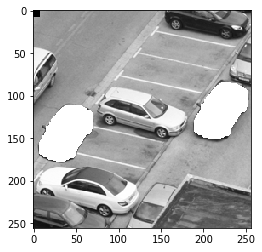

In [191]:
plt.figure()
plt.imshow(b, cmap="gray")

In [8]:
"""
plt.figure()
plt.imshow(bloklar[0, 0], cmap="gray")

plt.figure()
plt.imshow(dct_blogu[0, 0], cmap="gray")
"""
#plt.imshow(dct_blogu[0, 0], cmap="gray", vmax=np.max(dct_blogu[0, 0]) * 0.001, vmin=0)

'\nplt.figure()\nplt.imshow(bloklar[0, 0], cmap="gray")\n\nplt.figure()\nplt.imshow(dct_blogu[0, 0], cmap="gray")\n'